# Backtesting Investment Portfolio

By: Isaac Agyei

In [1]:
import pandas as pd
import numpy as np
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import datetime as dt
import matplotlib.style as style

# Capturing Historical Stock Market Data

For simplicity I’ll back test the portfolio by comparing the opening and closing prices of stocks within a specified date range. I’ve captured the stock market data using the pandas-datareader module.

In [3]:
# I'll use the global variables in this cell to create a dataframe
start = dt.date(2018,1,1)
end = dt.date.today()
list_prices = []
company_tickers = []

# Using *args will allow me to select a wide range of companies to backtest
def data_collector(*args):

    for item in args:

        prices = web.DataReader(item,'yahoo',start,end)
        company_tickers.append(item)

        start_prices = pd.DataFrame(prices).iloc[0,2]
        close_prices = pd.DataFrame(prices).iloc[-1,3]
        list_prices.append([start_prices,close_prices])
    
    return list_prices

    
data_collector('MSFT','AAPL','ADS','WMT','FB','GOOG','PM','NKE')


[[86.12999725341797, 149.6199951171875],
 [170.16000366210938, 263.19000244140625],
 [254.2899932861328, 101.22000122070312],
 [99.30000305175781, 119.12999725341797],
 [177.67999267578125, 197.50999450683594],
 [1048.3399658203125, 1303.050048828125],
 [105.81999969482422, 83.4800033569336],
 [62.849998474121094, 93.05000305175781]]

# Creating a DataFrame

In [4]:
portfolio_df = pd.DataFrame(np.array(list_prices),
                            index=company_tickers,
                            columns=[start,end])
                      
portfolio_df

,2018-01-01,2019-11-20
MSFT,86.129997,149.619995
AAPL,170.160004,263.190002
ADS,254.289993,101.220001
WMT,99.300003,119.129997
FB,177.679993,197.509995
GOOG,1048.339966,1303.050049
PM,105.820000,83.480003
NKE,62.849998,93.050003


# Allocating Percentages to Each Asset
The function prcnt_per_investment allows me to allocate percentages of my portfolio to each asset and set the dollar value of my initial investment.

In [5]:
allocation_spread = []
number_of_investments = len(portfolio_df.index)

def prcnt_per_asset(initial_investment: int):
    
    prcnt = 100
    num_invts = 0
    portfolio_df['Investment'] = initial_investment

    while prcnt <= 100:
        
        prcnt_distr = int(input(f'Percent allocated to {portfolio_df.index.values[num_invts]}: '))
        
        if prcnt_distr < 0:
            print('You cannot allocate a negative percentage','\n')
        elif prcnt_distr > 100:
            print('You cannot allocate a percentage > 100 to any investment','\n')
        elif type(prcnt_distr) != int:
            print('You percent must be an integer')

        if prcnt_distr >= 0 and prcnt_distr <= 100:
            allocation_spread.append(prcnt_distr)
            prcnt -= prcnt_distr
            num_invts +=1
            print(f'Number of assets left: {number_of_investments-num_invts}')
            print(f'Percent remaining: {prcnt}%','\n')
            
            if prcnt < 0:
                allocation_spread.pop()
                prcnt += prcnt_distr
                num_invts -=1
                print(f"You've allocated more percentage to {portfolio_df.index.values[num_invts]} than is avaiable")
                print(f'Number of assets left: {number_of_investments-num_invts}')
                print(f'Percent remaining: {prcnt}%','\n')

        if num_invts == number_of_investments and prcnt >= 0:
            break
        
prcnt_per_asset(10_000)

Percent allocated to MSFT: 10
Number of assets left: 7
Percent remaining: 90% 

Percent allocated to AAPL: 15
Number of assets left: 6
Percent remaining: 75% 

Percent allocated to ADS: 12
Number of assets left: 5
Percent remaining: 63% 

Percent allocated to WMT: 33
Number of assets left: 4
Percent remaining: 30% 

Percent allocated to FB: 8
Number of assets left: 3
Percent remaining: 22% 

Percent allocated to GOOG: 5
Number of assets left: 2
Percent remaining: 17% 

Percent allocated to PM: 10
Number of assets left: 1
Percent remaining: 7% 

Percent allocated to NKE: 7
Number of assets left: 0
Percent remaining: 0% 



# Adding New Columns to the Portfolio Dataframe
The values in the column “Buying_Price” of the newly constructed dataframe have been rounded to the nearest whole number. For this reason, our initial investment is perfectly allocated to each asset. Realistically your initial investment wouldn’t be 100% allocated because you can’t purchase fractions of stocks (which I did in this example).

In [6]:
portfolio_df['Percent_Allocation'] = np.array(allocation_spread) * 0.01
portfolio_df['Mx_Stcks_Purchased'] = np.array(portfolio_df.loc[:,'Investment']) / np.array(portfolio_df.loc[:,start])
portfolio_df['Stcks_Prcnt'] = np.array(portfolio_df.loc[:,'Mx_Stcks_Purchased']) * np.array(portfolio_df.loc[:,'Percent_Allocation'])
portfolio_df['Buying_Price'] = np.array(portfolio_df.loc[:,'Stcks_Prcnt']) * np.array(portfolio_df.loc[:,start])
portfolio_df['Selling_Price'] = np.array(portfolio_df.loc[:,'Stcks_Prcnt']) * np.array(portfolio_df.loc[:,end])
portfolio_df.set_index(['Investment',company_tickers], inplace=True)
portfolio_df.drop(['Mx_Stcks_Purchased','Stcks_Prcnt'], axis=1, inplace=True)

portfolio_df

2018-01-01   2019-11-20  Percent_Allocation  Buying_Price  \
Investment                                                                    
10000      MSFT    86.129997   149.619995                0.10        1000.0   
           AAPL   170.160004   263.190002                0.15        1500.0   
           ADS    254.289993   101.220001                0.12        1200.0   
           WMT     99.300003   119.129997                0.33        3300.0   
           FB     177.679993   197.509995                0.08         800.0   
           GOOG  1048.339966  1303.050049                0.05         500.0   
           PM     105.820000    83.480003                0.10        1000.0   
           NKE     62.849998    93.050003                0.07         700.0   

                 Selling_Price  
Investment                      
10000      MSFT    1737.141529  
           AAPL    2320.081072  
           ADS      477.659384  
           WMT     3959.002808  
           FB       889.284118  
           GOOG     621.482578  
           PM       788.886823  
           NKE     1036.356463

# Calculating The Return on Investment (ROI)

In [7]:
value_bought = np.array(portfolio_df.loc[:,'Buying_Price'])
value_sold = np.array(portfolio_df.loc[:,'Selling_Price'])
total_port_invested = portfolio_df.index[0][0]
total_port_returned = sum(np.array(portfolio_df.loc[:,'Selling_Price']))
labels_ax1 = np.array(company_tickers)
labels_ax2 = np.array(['Portfolio Balance'])

print(f"With an initial investment of ${total_port_invested} your return is approx: ${round(total_port_returned,2)}\n")                        

With an initial investment of $10000 your return is approx: $11829.89



# Plotting ROI per Asset & ROI of the Portfolio

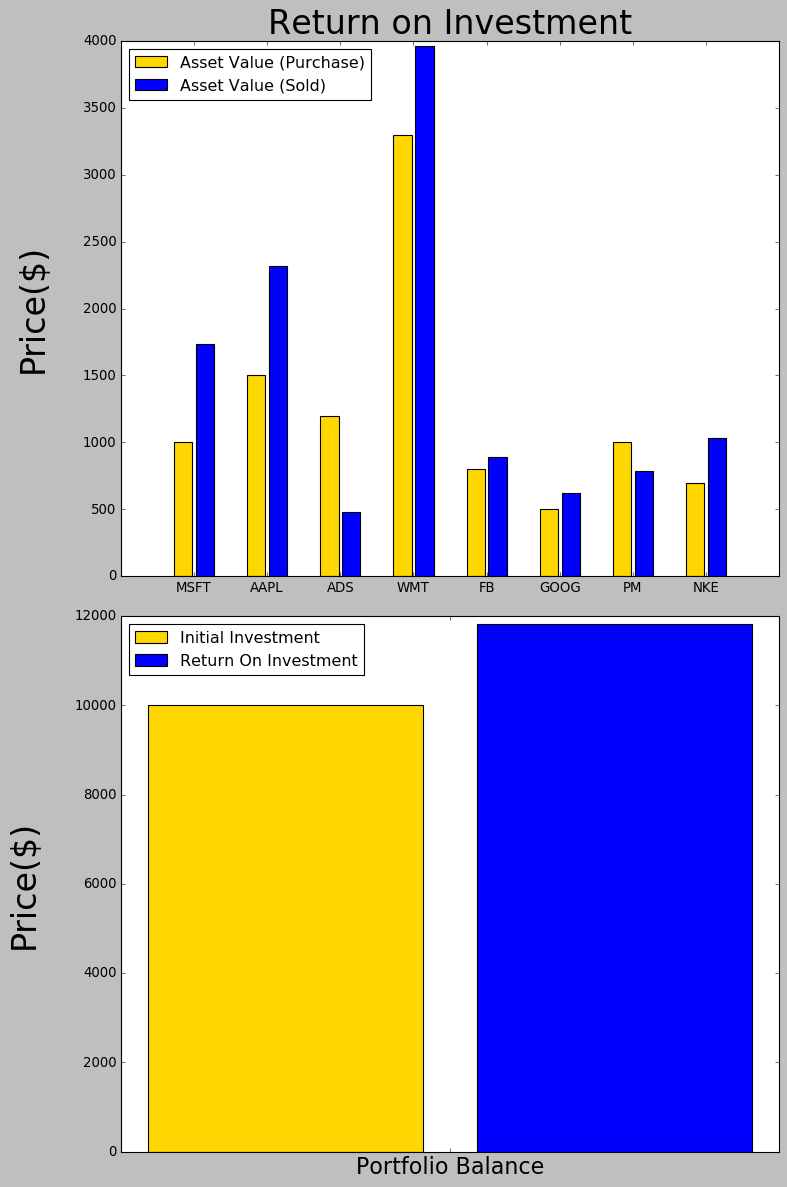

In [9]:
x1 = np.arange(len(labels_ax1))
x2 = np.arange(len(labels_ax2))
width = 0.25

plt.style.use('classic')
fig,(ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10,15))


ax1.bar(x1-0.15, value_bought, width, label='Asset Value (Purchase)', color='gold')
ax1.bar(x1+0.15, value_sold, width, label='Asset Value (Sold)', color='blue')

ax1.set_ylabel('Price($)',labelpad=30,fontsize=30)
ax1.set_title('Return on Investment',fontsize=30)
ax1.set_xticks(x1)
ax1.set_xticklabels(labels_ax1,color='black')
ax1.legend(loc='upper left')


ax2.bar(x2-0.03, total_port_invested, width-0.20, label='Initial Investment', color='gold')
ax2.bar(x2+0.03, total_port_returned, width-0.20, label='Return On Investment', color='blue')
ax2.set_ylabel('Price($)',labelpad=30,fontsize=30)
ax2.set_xticks(x2)
ax2.set_xticklabels(labels_ax2,fontsize=20)
ax2.legend(loc='upper left')

fig.tight_layout()

